# Review Titanic

In [1]:
# import library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [2]:
df= pd.read_csv('titanic.csv')

In [3]:
df.head()

,sex,age,parch,fare,class,deck,embark_town,alive,alone
0,male,22.0,0,7.2500,Third,NaN,Southampton,no,False
1,female,38.0,0,71.2833,First,C,Cherbourg,yes,False
2,female,26.0,0,7.9250,Third,NaN,Southampton,yes,True
3,female,35.0,0,53.1000,First,C,Southampton,yes,False
4,male,35.0,0,8.0500,Third,NaN,Southampton,no,True


# EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sex          891 non-null    object 
 1   age          714 non-null    float64
 2   parch        891 non-null    int64  
 3   fare         891 non-null    float64
 4   class        891 non-null    object 
 5   deck         203 non-null    object 
 6   embark_town  889 non-null    object 
 7   alive        891 non-null    object 
 8   alone        891 non-null    bool   
dtypes: bool(1), float64(2), int64(1), object(5)
memory usage: 56.7+ KB


Age, deck, embark town ada missing values. 

alone datanya boolean.

In [8]:
df.describe(include='all')

,sex,age,parch,fare,class,deck,embark_town,alive,alone
count,891,714.000000,891.000000,891.000000,891,203,889,891,891
unique,2,NaN,NaN,NaN,3,7,3,2,2
top,male,NaN,NaN,NaN,Third,C,Southampton,no,True
freq,577,NaN,NaN,NaN,491,59,644,549,537
mean,NaN,29.699118,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN
std,NaN,14.526497,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN
min,NaN,0.420000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,20.125000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN
50%,NaN,28.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN
75%,NaN,38.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN


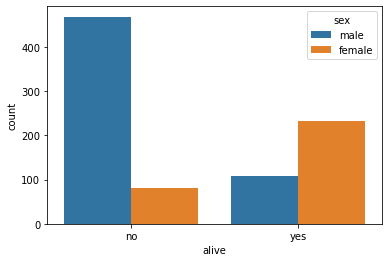

In [11]:
sns.countplot(x='alive',data=df,hue='sex')

Jumlah penumpang laki-laki lebih banyak dari perempuan, tetapi, secara ratio, ratio penumpang perempuan yang selamat lebih besar.

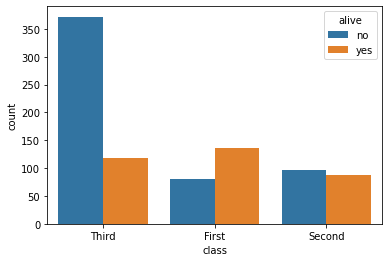

In [12]:
sns.countplot(x='class',data=df,hue='alive')

In [ ]:
Jumlah penumpang kelas 3 paling banyak, dan secarar ratio, korban dari kelas 3 juga yang paling banyak. Selain itu, pada kelas pertama, jumlah penumpang yg selamat lebih banyaj dibanding yang tidak selamat.

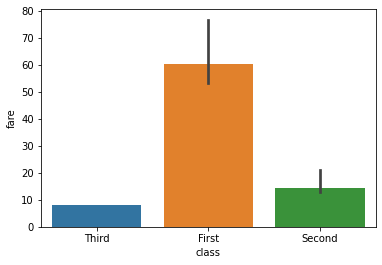

In [27]:
sns.barplot(x='class',y='fare', data=df,estimator=np.median)

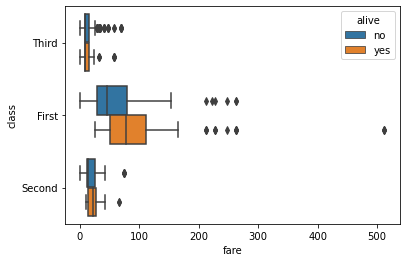

In [29]:
sns.boxplot(y='class', x='fare', hue='alive', data=df)

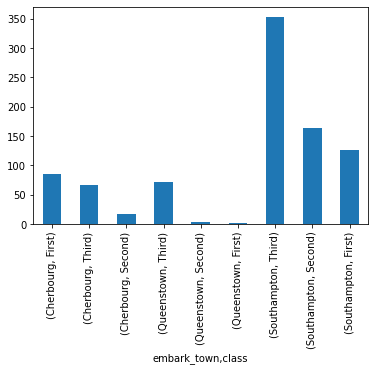

In [14]:
df.groupby('embark_town')['class'].value_counts().plot(kind='bar')

In [ ]:
Kebanyakan penumnpang berasal dari Southampton, kemungkinan pada jaman itu, Southampton merukan kota yang makmur. Sementara,jumlah penunpang paling sedikit berasal dari Queenstown.

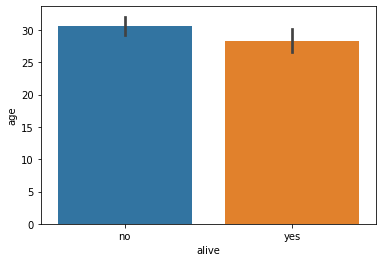

In [18]:
sns.barplot(x='alive', y='age', data=df)

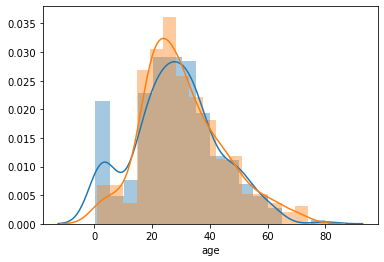

In [22]:
sns.distplot(df[df['alive']=='yes']['age'])
sns.distplot(df[df['alive']=='no']['age'])

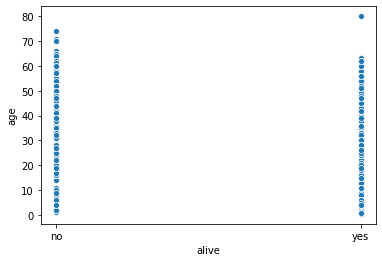

In [24]:
sns.scatterplot(x='alive', y='age', data=df)

In [ ]:
Ada lonjakan jumlah selamat pada penumpang berusia anak-anak, sedangkan pada usia manula, ada sedikit lonjakan pada yang tidak selamat.

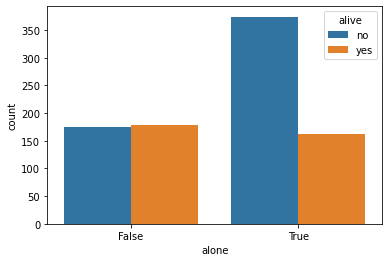

In [23]:
sns.countplot(x='alone', data=df, hue='alive')

In [ ]:
Ratio orang yang tidak selamat jauh lebih tinggi ketika dia naik kapal sendiri.

In [ ]:
Saran: Untuk orang yang naik Titanic, jika ada kecelakaan, kemungkinan untuk survive lebih tinggi apabila anda wanita, masih muda dan membayar mahal untuk kabin kelas pertama.

Selain EDA di atas, kalian juga bisa cek korelasi (terutama apabila kasusnya regresi)

# Preprocessing

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sex          891 non-null    object 
 1   age          714 non-null    float64
 2   parch        891 non-null    int64  
 3   fare         891 non-null    float64
 4   class        891 non-null    object 
 5   deck         203 non-null    object 
 6   embark_town  889 non-null    object 
 7   alive        891 non-null    object 
 8   alone        891 non-null    bool   
dtypes: bool(1), float64(2), int64(1), object(5)
memory usage: 56.7+ KB


In [34]:
df.isna().sum()/df.shape[0]*100

sex             0.000000
age            19.865320
parch           0.000000
fare            0.000000
class           0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [35]:
df.head()

,sex,age,parch,fare,class,deck,embark_town,alive,alone
0,male,22.0,0,7.2500,Third,NaN,Southampton,no,False
1,female,38.0,0,71.2833,First,C,Cherbourg,yes,False
2,female,26.0,0,7.9250,Third,NaN,Southampton,yes,True
3,female,35.0,0,53.1000,First,C,Southampton,yes,False
4,male,35.0,0,8.0500,Third,NaN,Southampton,no,True


>* onehot --> onehot mengubah kategori di dalam feature menjadi masing-masing feature baru yang berisikan 1 atau 0. 
>* ordinal --> untuk data ordinal, mengubah kategori menjadi angka sesuai urutan yang kita tentukan
>* binary --> mengubah feature menjadi data binari, jumlah kolom baru disesuaikan dengan digit angka binari tertinggi setelah encoding, dipakai untuk data nominal yang jumlah kategorinya banyak.

feature temperature: cool, warm, hot 

one hot encoding--> nominal maupun ordinal, yang isi kategorinya tidak terlalu banyak  
temp_cool 1, 0, 0  --> drop= first, maka kolom pertama didrop ( untuk mencegah multicolinearity)  
temp_warm 0, 1, 0  
temp_hot  0, 0, 1  

 Binary encoding  
 
        kolom 1     kolom 2     kolom 3  
0 -->       0           0           0  
1 -->       0           0           1  
2 -->       0           1           0  
3 -->       0           1           1  
4 -->       1           0           0  

Tahap preprocessing:  

* Drop kolom deck karena terlalu banyak missing value
* Tipe data alone diganti menjadi string
* Encoding (sex,class,embark_town, alone, alive--> target data)
* Putuskan jenis encoding mana yang sesuai untuk tiap feature.
>* sex --> **onehot**, binary
>* class --> **onehot**, ordinal
>* embark_town --> (isi missing value) binary, **onehot**
>* alone --> **onehot**, binary
* Isi missing value age

putuskan juga, untuk missing value, mau diisi dengan metode apa dan apakah kalian mau scaling data numerik kalian.


In [36]:
# library untuk preprocessing

from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [37]:
df=df.drop('deck', axis=1)

In [38]:
df.head()

,sex,age,parch,fare,class,embark_town,alive,alone
0,male,22.0,0,7.2500,Third,Southampton,no,False
1,female,38.0,0,71.2833,First,Cherbourg,yes,False
2,female,26.0,0,7.9250,Third,Southampton,yes,True
3,female,35.0,0,53.1000,First,Southampton,yes,False
4,male,35.0,0,8.0500,Third,Southampton,no,True


In [39]:
df['alone']=df['alone'].astype(str)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sex          891 non-null    object 
 1   age          714 non-null    float64
 2   parch        891 non-null    int64  
 3   fare         891 non-null    float64
 4   class        891 non-null    object 
 5   embark_town  889 non-null    object 
 6   alive        891 non-null    object 
 7   alone        891 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 55.8+ KB


In [42]:
onehot_fill=Pipeline([
    ('fillna',SimpleImputer(strategy='most_frequent')),
    ('encode',OneHotEncoder(drop='first'))
])

transformer= ColumnTransformer([('one_hot',OneHotEncoder(drop='first'),['sex','class','alone']),
    ('onehot_fill', onehot_fill, ['embark_town']),
    ('fill_age', SimpleImputer(strategy='mean'),['age']), 
], remainder='passthrough')

# Splitting data

In [47]:
from sklearn.model_selection import train_test_split

In [44]:
X=df.drop('alive',axis=1)
y=[1 if i=='yes' else 0 for i in df['alive']]

In [49]:
X_train, X_test, y_train, y_test= train_test_split(X,y,
    test_size=.2,
    stratify=y,
    random_state=2020)

# Select Benchmark

In [54]:
#library

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import f1_score, classification_report
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [61]:
models = [
    ['Log Regression', LogisticRegression()],
    ['DecisionTree', DecisionTreeClassifier()],
    ['RandomForest', RandomForestClassifier()],
    ['KNeighbours', KNeighborsClassifier()]]

In [66]:
def evaluate(models):
    model_name=[]
    f1_score=[]
    f1_std=[]

    for name, model in models:
        estimator=Pipeline([('preprocess',transformer),('model',model)])

        skfold= StratifiedKFold(n_splits=5)

        model_name.append(name)
        f1_score.append(cross_val_score(estimator, X_train,y_train, cv=skfold,scoring='f1').mean())
        f1_std.append(cross_val_score(estimator, X_train,y_train, cv=skfold,scoring='f1').std())

    return pd.DataFrame({
        'model': model_name,
        'f1_score':f1_score,
        'f1_std':f1_std
        })


In [67]:
evaluate(models)

,model,f1_score,f1_std
0,Log Regression,0.722298,0.060493
1,DecisionTree,0.712037,0.030048
2,RandomForest,0.734203,0.051703
3,KNeighbours,0.566397,0.067712


Random forest dipilih karena memiliki score paling tinggi, dengan std relatif erndah (model stabil)

In [68]:
#check benchmark preformance against test data
estimator=Pipeline([('preprocess',transformer),('model',RandomForestClassifier())])
estimator.fit(X_train,y_train)
f1_score(y_test, estimator.predict(X_test))

0.71875

# Hyperparameter Tunning

In [70]:
#library

from sklearn.model_selection import GridSearchCV

In [71]:
hyperparam_space = {
        # 'model__n_estimators' : [50, 75, 100, 150],
        'model__min_samples_leaf' : [1,5,10,15,20,50],
        'model__min_samples_split' : [2,5,10,15,20,50],
        'model__max_depth' : [2,3,4,5,6,7],
        'model__criterion' : ['entropy','gini']}

In [72]:
estimator=Pipeline([('preprocess',transformer),('model',RandomForestClassifier())])
skfold= StratifiedKFold(n_splits=5)

grid= GridSearchCV(estimator,param_grid=hyperparam_space,cv=skfold,scoring='f1',n_jobs=-1)
grid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('one_hot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['sex',
                                                                          'class',
                                                                          'alone']),
                                                                        ('onehot_fill',
                                                                         Pipeline(steps=[('fillna',
                                                                                          SimpleImputer(strategy='most_frequent')),
                             

In [73]:
grid.best_params_

{'model__criterion': 'gini',
 'model__max_depth': 7,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 5}

In [74]:
grid.best_score_ #naik 0.01 poin dari hasil cv default

0.7448595375073905

In [78]:
# evaluasi best estimator ke test data

grid.best_estimator_.fit(X_train,y_train)
f1_score(y_test,grid.best_estimator_.predict(X_test))

# score turun, tanpa hyperparameter tunning lebih baik

# coba dengan parameter lain
# coba dengan model lain

0.7213114754098361

In [76]:
# save model

import pickle

estimator=Pipeline([('preprocess',transformer),('model',RandomForestClassifier())])
model_final=estimator.fit(X_train,y_train)

pickle.dump(model_final,open('final_model.sav','wb'))

In [79]:
#simpan hasil tunning

import pickle

model_final=grid.best_estimator_.fit(X_train,y_train)

pickle.dump(model_final,open('final_tunning.sav','wb'))